# Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib

## Series

one-dimensional array-like object containing data +
index (customizable, not necessarily unique)


### Creation

In [2]:
# create Series from a list or a tuple
# default index starts at 0
data_list = ["Tom", "Bob", "Lea", "Ada", "Tom"]
data_tuple = ("Tom", "Bob", "Lea", "Ada", "Tom")
s = pd.Series(data_list)
s = pd.Series(data_tuple)
print(s)

0    Tom
1    Bob
2    Lea
3    Ada
4    Tom
dtype: object


In [3]:
# specify a custom index
data_index = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(data_list, data_index)
print(s)

a    Tom
b    Bob
c    Lea
d    Ada
e    Tom
dtype: object


In [4]:
# index items don't have to be unique
data_index = ['a', 'b', 'a', 'b', 'e']
s = pd.Series(data_list, data_index)
print(s)

a    Tom
b    Bob
a    Lea
b    Ada
e    Tom
dtype: object


In [5]:
# create Series from a dictionary
data_dict = {"cook":"Tom", "driver":"Bob", "gardener":"Lea", "maid":"Ada"}
s = pd.Series(data_dict)
s

cook        Tom
driver      Bob
gardener    Lea
maid        Ada
dtype: object

In [6]:
# pandas uses np.nan to represent missing data
s = pd.Series(["Tom", "Bob", "Lea", np.nan, "Tom"])
s

0    Tom
1    Bob
2    Lea
3    NaN
4    Tom
dtype: object

### select

Index is used to select one or multiple values

In [7]:
data_list = ["Tom", "Bob", "Lea", "Ada", "Tom"]
data_index = ['a', 'b', 'a', 'b', 'e']
s = pd.Series(data_list, data_index)
print(s)
print(s['a'])
print(s[['a','e']])

a    Tom
b    Bob
a    Lea
b    Ada
e    Tom
dtype: object
a    Tom
a    Lea
dtype: object
a    Tom
a    Lea
e    Tom
dtype: object


In [8]:
s = pd.Series(range(10,15))
print(s)
print(s[2:4])

0    10
1    11
2    12
3    13
4    14
dtype: int64
2    12
3    13
dtype: int64


### Filtering

In [9]:
s = pd.Series(range(10,15))
print(s)
print(s[s > 12])

0    10
1    11
2    12
3    13
4    14
dtype: int64
3    13
4    14
dtype: int64


### Operations

In [10]:
print(s + 5)

0    15
1    16
2    17
3    18
4    19
dtype: int64


### Operations between Series

Operations between Series (+ - / *) align values based on their associated index values –they need not be the same length. The result index will be the
sorted union of the two indexes.

In [11]:
s1 = pd.Series(range(1,4))
print(s1)
s2 = pd.Series([10, np.nan, 20, 30])
print(s2)
s2 + s1

0    1
1    2
2    3
dtype: int64
0    10.0
1     NaN
2    20.0
3    30.0
dtype: float64


0    11.0
1     NaN
2    23.0
3     NaN
dtype: float64

In [12]:
s1 = pd.Series(range(1,4), ["jan.", "fev.", "mar."])
print(s1)
s2 = pd.Series([10, np.nan, 20, 30])
print(s2)
s2 + s1

jan.    1
fev.    2
mar.    3
dtype: int64
0    10.0
1     NaN
2    20.0
3    30.0
dtype: float64


0      NaN
1      NaN
2      NaN
3      NaN
fev.   NaN
jan.   NaN
mar.   NaN
dtype: float64

# DataFrame

- Spreadsheet-like data structure
- Row index and column index
- !!! It’s not a good idea to have 2 columns with the same name
- A column = a Series


### Creation

In [13]:
sales = pd.DataFrame(np.random.randint(0, 100, (4, 3)), index=["Q1","Q2","Q3","Q4"], columns=range(2017,2020))
print(sales)

    2017  2018  2019
Q1    76    98    13
Q2    99    52    92
Q3    26    69    50
Q4    53    45    91


In [14]:
grades = pd.DataFrame({'Maths': {"Bob":10, "Alice":13, "John": 11}, 'Sport': {"Bob":17, "Alice":15}, 'Hist.': {"Bob":7, "Alice":16, "John": 10}})
print(grades)

       Maths  Sport  Hist.
Bob       10   17.0      7
Alice     13   15.0     16
John      11    NaN     10


### Select

In [15]:
# Select by column name
grades['Maths']

Bob      10
Alice    13
John     11
Name: Maths, dtype: int64

In [16]:
# Select by row name
grades.loc['Bob']

Maths    10.0
Sport    17.0
Hist.     7.0
Name: Bob, dtype: float64

In [17]:
# Select by row index
grades.iloc[0]

Maths    10.0
Sport    17.0
Hist.     7.0
Name: Bob, dtype: float64

In [18]:
# Select multiple rows by index
grades.iloc[0:2]

Maths  Sport  Hist.
Bob       10   17.0      7
Alice     13   15.0     16

### New column

In [19]:
# direct assigment
grades["Litt."] = [14, 18, 16]
grades

Maths  Sport  Hist.  Litt.
Bob       10   17.0      7     14
Alice     13   15.0     16     18
John      11    NaN     10     16

In [20]:
# computed values
grades["double sport"] = grades["Sport"]*2
grades

Maths  Sport  Hist.  Litt.  double sport
Bob       10   17.0      7     14          34.0
Alice     13   15.0     16     18          30.0
John      11    NaN     10     16           NaN

### New row

In [21]:
ada = pd.DataFrame({"Maths": 12, "Sport": 13, "Hist.": 14, "Litt.": 9}, index=["Ada"])
pd.concat([grades, ada])

Maths  Sport  Hist.  Litt.  double sport
Bob       10   17.0      7     14          34.0
Alice     13   15.0     16     18          30.0
John      11    NaN     10     16           NaN
Ada       12   13.0     14      9           NaN

### Operations

In [22]:
grades.loc['Bob'].mean()

16.4

In [23]:
grades < 12

Maths  Sport  Hist.  Litt.  double sport
Bob     True  False   True  False         False
Alice  False  False  False  False         False
John    True  False   True  False         False

In [24]:
grades[grades>16] = 20
grades

Maths  Sport  Hist.  Litt.  double sport
Bob       10   20.0      7     14          20.0
Alice     13   15.0     16     20          20.0
John      11    NaN     10     16           NaN

### Plotting

<AxesSubplot: >

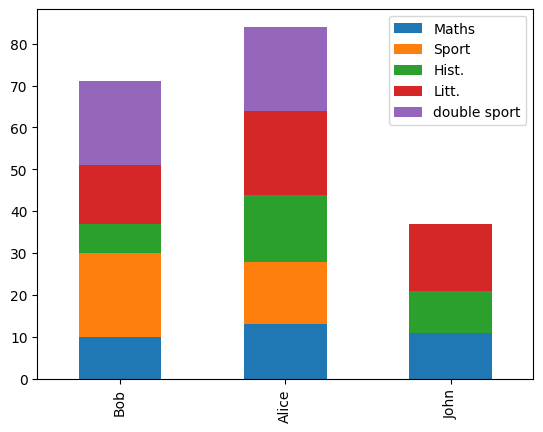

In [25]:
import matplotlib
grades.plot(kind="bar", stacked=True)